# **Bird Species classification**


A  machine learning task is the type of prediction or inference being made, based on the problem or question that is being asked, and the available data.
Here the problem is that Zoological Society of London have to research and develop an implementation plan for a machine learning system to classify birds into different ecological groups using skeletal measurements.There are 420 birds contained in this dataset. Each bird is represented by 10 measurements:

* Length and Diameter of Humerus
* Length and Diameter of Ulna
* Length and Diameter of Femur
* Length and Diameter of Tibiotarsus
* Length and Diameter of Tarsometatarsus etc.

Each bird has a label for its ecological group:

* SW: Swimming Birds
* W: Wading Birds
* T: Terrestrial Birds
* R: Raptors
* P: Scansorial Birds
* SO: Singing Birds


**Import required packages**


In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import mstats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import warnings
# Ignore warning messages
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


## Data Preprocessing

In [42]:
# Load the data from a CSV file
data = pd.read_csv('bird.csv')

# Display the first few rows of the dataset
print(data.head())

   id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw type
0   0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   SW
1   1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   SW
2   2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   SW
3   3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   SW
4   4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   SW


The dataset comprises measurements of various bird species categorized into six ecological groups: Swimming Birds (SW), Wading Birds (W), Terrestrial Birds (T), Raptors (R), Scansorial Birds (P), and Singing Birds (SO).
This dataset comprises 420 bird samples, each represented by 10 measurements related to the length and diameter of specific bones.  The dataset is structured as a CSV file with 420 rows and 11 columns. The columns include an ID column, bone measurement columns (humerus length and diameter, ulna length and diameter, femur length and diameter, tibiotarsus length and diameter, tarsometatarsus length and diameter), and an ecological group (type) column.

### Missing Data

In [43]:
# Check for missing values
print(data.isnull().sum())


id       0
huml     1
humw     1
ulnal    3
ulnaw    2
feml     2
femw     1
tibl     2
tibw     1
tarl     1
tarw     1
type     0
dtype: int64


 columns "huml", "humw", "ulnal", "ulnaw", "feml", "femw", "tibl", "tibw", "tarl", "tarw", and "type" have 1 to 3 null values, except for the column "type" which has 0 null values.

Let's visualize the missing values through heap map

<Axes: >

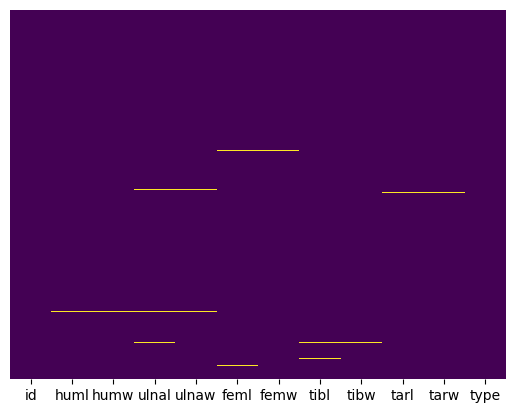

In [44]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [45]:
# Missing values in the columns are replaced with the mean value calculated from the non-null values in each column
data['huml'].fillna(data['huml'].mean(), inplace=True)
data['humw'].fillna(data['humw'].mean(), inplace=True)
data['ulnal'].fillna(data['ulnal'].mean(), inplace=True)
data['ulnaw'].fillna(data['ulnaw'].mean(), inplace=True)
data['feml'].fillna(data['feml'].mean(), inplace=True)
data['femw'].fillna(data['femw'].mean(), inplace=True)
data['tibl'].fillna(data['tibl'].mean(), inplace=True)
data['tibw'].fillna(data['tibw'].mean(), inplace=True)
data['tarl'].fillna(data['tarl'].mean(), inplace=True)
data['tarw'].fillna(data['tarw'].mean(), inplace=True)

# Verify null value handling
null_counts_after = data.isnull().sum()
print(null_counts_after)


id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64


### Statistics

Describing the statistics of a dataframe provides valuable insights into the data distribution and summary statistics of each column. By performing statistical analysis, we gain a better understanding of the central tendency, dispersion, and shape of the data.

In [46]:
# Display the statistics
print(data.describe())

               id        huml        humw       ulnal       ulnaw        feml  \
count  420.000000  420.000000  420.000000  420.000000  420.000000  420.000000   
mean   209.500000   64.650501    4.370573   69.115372    3.597249   36.872416   
std    121.387808   53.770269    2.851208   58.573950    2.181522   19.931342   
min      0.000000    9.850000    1.140000   14.090000    1.000000   11.830000   
25%    104.750000   25.205000    2.190000   28.132500    1.870000   21.332500   
50%    209.500000   44.325000    3.510000   43.880000    2.965000   31.390000   
75%    314.250000   90.220000    5.805000   97.205000    4.770000   47.100000   
max    419.000000  420.000000   17.840000  422.000000   12.000000  117.070000   

             femw        tibl        tibw        tarl        tarw  
count  420.000000  420.000000  420.000000  420.000000  420.000000  
mean     3.220883   64.662823    3.182339   39.229976    2.930024  
std      2.021165   37.747731    2.078343   23.156631    2.183063 

* Count: The number of non-null values in each column.
* Mean: The average value of each column.
* Std: The standard deviation, which measures the dispersion or variability of the values.
* Min: The minimum value in each column.
* 25%: The first quartile, representing the lower boundary of the middle 50% of the data.
* 50%: The second quartile, which is the median or the midpoint of the data.
* 75%: The third quartile, representing the upper boundary of the middle 50% of the data.
* Max: The maximum value in each column.
These statistics provide insights into the distribution and variability of the data. For example, the 'huml' column has a mean value of 64.65 and a standard deviation of 53.77, indicating a relatively wide range of values. The 'tibl' column has a maximum value of 240.0, while the 'tarw' column has a minimum value of 0.66.

### Outliers

Outliers in a dataframe refer to data points that deviate significantly from the overall pattern or distribution of the data. They are values that are either extremely high or extremely low compared to the majority of the data points. Identifying and handling outliers is an essential step in data analysis as they can have a significant impact on statistical analysis and modeling results.

In [47]:

# Calculate z-scores for each column
z_scores = (data - data.mean()) / data.std()

# Define a threshold for outliers (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find outliers in each column
outliers = np.abs(z_scores) > threshold

# Print the indices of rows containing outliers for each column
for column in data.columns:
    column_outliers = outliers[column]
    if any(column_outliers):
        print(f"Outliers in '{column}':")
        print(data[column][column_outliers].index)
        print()


Outliers in 'huml':
Int64Index([38, 39, 56, 57, 58, 59, 60], dtype='int64')

Outliers in 'humw':
Int64Index([29, 33, 38, 39, 56, 58, 202], dtype='int64')

Outliers in 'ulnal':
Int64Index([32, 33, 36, 38, 39, 56, 57, 58, 59, 60], dtype='int64')

Outliers in 'ulnaw':
Int64Index([29, 33, 38, 39, 58, 174], dtype='int64')

Outliers in 'feml':
Int64Index([58, 117, 201, 202], dtype='int64')

Outliers in 'femw':
Int64Index([38, 39, 58, 201, 202], dtype='int64')

Outliers in 'tibl':
Int64Index([11, 12, 56, 58, 60, 116, 117, 201, 202], dtype='int64')

Outliers in 'tibw':
Int64Index([12, 38, 39, 56, 58, 60, 201, 202], dtype='int64')

Outliers in 'tarl':
Int64Index([58, 116, 117, 201, 202], dtype='int64')

Outliers in 'tarw':
Int64Index([26, 27, 29, 30, 39, 232], dtype='int64')



These indices represent the rows in the dataset where the values in the respective columns deviate significantly from the majority of the data points. Outliers can sometimes be influential points that may impact the analysis or modeling process. So, it's important to remove these outliers.

**Box Plot :**
A box plot is a graphical representation that provides a visual summary of the distribution of a dataset. It displays the minimum, first quartile (25th percentile), median (second quartile or 50th percentile), third quartile (75th percentile), and maximum values of a variable. It also shows any potential outliers present in the data. Here I visualizing the outliers in boxplot


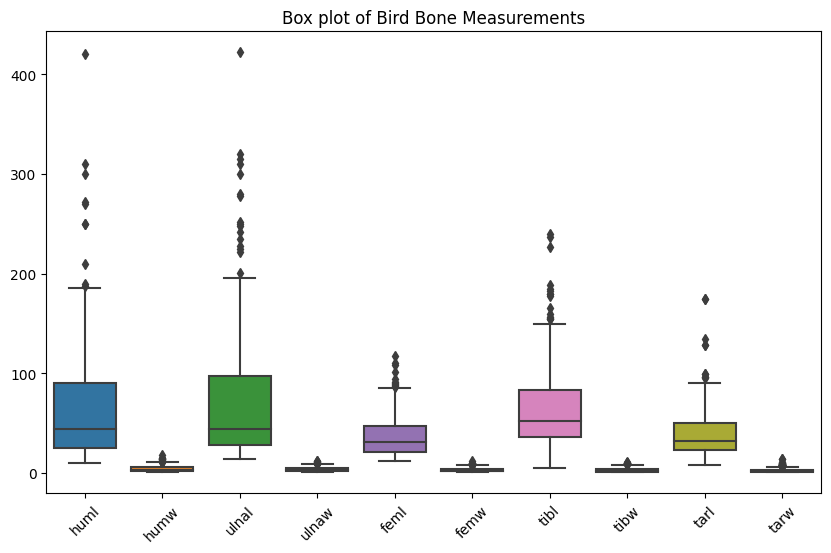

In [48]:
# Box plot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(['id'], axis=1))
plt.title('Box plot of Bird Bone Measurements')
plt.xticks(rotation=45)
plt.show()

**Winsorization** is a technique used to limit the impact of outliers by replacing extreme values with less extreme values. By performing winsorization on the 'huml' variable, the extreme values in the lower and upper tails of the distribution are adjusted, reducing their impact on statistical analyses or visualizations. Winsorization helps in achieving a more robust and stable analysis by minimizing the influence of outliers while still retaining the overall pattern of the data.

In [49]:
# These limits indicate that the lower and upper 5% of values in the 'huml' variable will be replaced with less extreme values.
data['huml'] = mstats.winsorize(data['huml'], limits=[0.05, 0.05])
data['humw'] = mstats.winsorize(data['humw'], limits=[0.05, 0.05])
data['ulnal'] = mstats.winsorize(data['ulnal'], limits=[0.05, 0.05])
data['ulnaw'] = mstats.winsorize(data['ulnaw'], limits=[0.05, 0.05])
data['feml'] = mstats.winsorize(data['feml'], limits=[0.05, 0.05])
data['femw'] = mstats.winsorize(data['femw'], limits=[0.05, 0.05])
data['tibl'] = mstats.winsorize(data['tibl'], limits=[0.05, 0.05])
data['tibw'] = mstats.winsorize(data['tibw'], limits=[0.05, 0.05])
data['tarl'] = mstats.winsorize(data['tarl'], limits=[0.05, 0.05])
data['tarw'] = mstats.winsorize(data['tarw'], limits=[0.05, 0.05])
# Repeat the above step for each column containing outliers

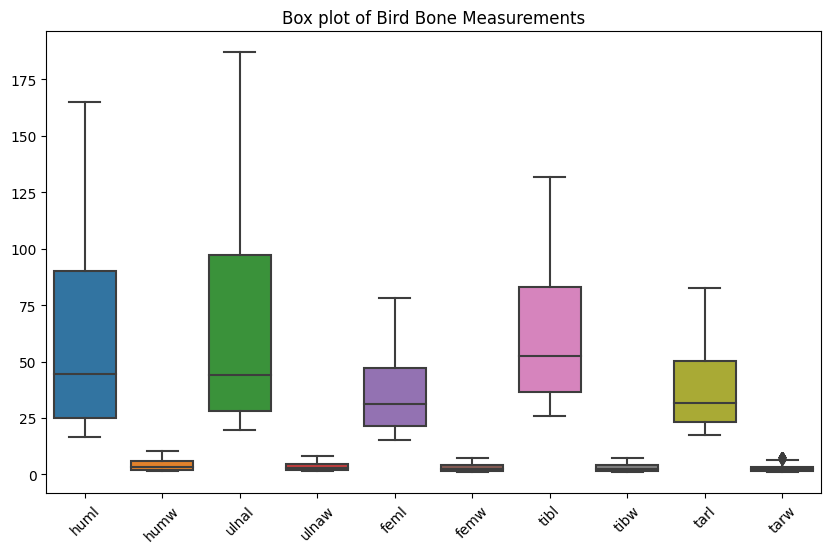

In [50]:
# Once again visualize boxplot for ensure that the outliers are removed.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(['id'], axis=1))
plt.title('Box plot of Bird Bone Measurements')
plt.xticks(rotation=45)
plt.show()

**Barchart  :**
A bar chart is a graphical representation of categorical data using rectangular bars. Each bar represents a category, and the height of the bar corresponds to the value or frequency of that category. Let's check the freequency of classes.

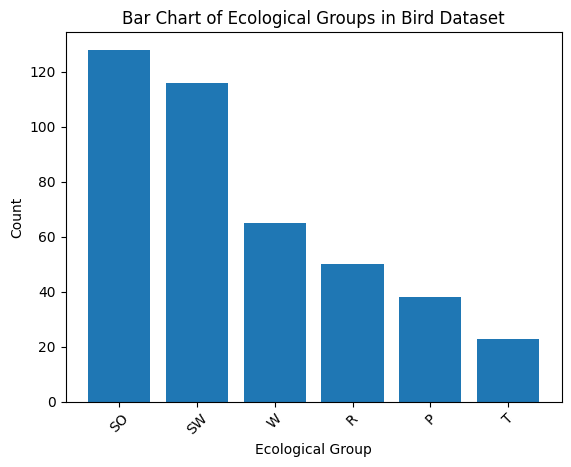

In [51]:

# Count the number of occurrences of each ecological group
group_counts = data['type'].value_counts()

# Create a bar chart
plt.bar(group_counts.index, group_counts.values)

# Set labels and title
plt.xlabel('Ecological Group')
plt.ylabel('Count')
plt.title('Bar Chart of Ecological Groups in Bird Dataset')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [52]:
# Count the frequency of each ecological group
frequency = data['type'].value_counts()

# Print the frequency
print(frequency)


SO    128
SW    116
W      65
R      50
P      38
T      23
Name: type, dtype: int64


It's clear that the class is not balanced. it will affect the performance of the model. Hence to balance the class SMOTE will perform later.

 **Skewness** measures the asymmetry of the distribution of a variable. Positive skewness indicates a longer right tail, while negative skewness indicates a longer left tail. The magnitude of the skewness value indicates the degree of skewness.

In [53]:
# Calculate skewness for each feature
skewness = data.skew()

# Print the skewness values
print(skewness)

id       0.000000
huml     0.916416
humw     0.962153
ulnal    1.103873
ulnaw    0.911894
feml     0.892922
femw     0.994029
tibl     0.814977
tibw     0.944723
tarl     0.965210
tarw     1.314834
dtype: float64


* Most of the features have positive skewness values, indicating a longer right tail in their distributions. This suggests that these features have outliers or extreme values on the higher end of the range.

* The features "tarw" and "ulnal" have relatively higher positive skewness values compared to the other features, indicating a more pronounced right-skewed distribution.

* The features "tibl" and "feml" have relatively lower positive skewness values, suggesting a less skewed distribution compared to the other features.

* The feature "tarw" has the highest skewness value of 1.314834, indicating a relatively more skewed distribution towards the right.

Overall, the skewness values suggest that the dataset may have some outliers or extreme values that are influencing the distribution of the features.

In [54]:
skewed_features = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

# Apply logarithmic transformation to positively skewed features
data[skewed_features] = np.log1p(data[skewed_features])

# Check the skewness after transformation
skewness_after = data[skewed_features].skew()

print(skewness_after)

huml     0.187905
humw     0.342052
ulnal    0.330643
ulnaw    0.360068
feml     0.221166
femw     0.472644
tibl     0.208643
tibw     0.409857
tarl     0.394795
tarw     0.637120
dtype: float64


**Logarithmic** transformation is commonly used to handle positively skewed data. By applying this transformation, I have effectively reduced the skewness and made the data more suitable for certain statistical analyses and machine learning algorithms that assume normality or require symmetric data.
* These values indicate that the skewness has been reduced compared to the original skewness values. The transformed features now have skewness values closer to zero, suggesting a more symmetric distribution.

**Correlation Matrix** A matrix where each entry represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, with values close to 1 indicating a strong positive correlation, values close to -1 indicating a strong negative correlation, and values close to 0 indicating no or weak correlation between the variables.

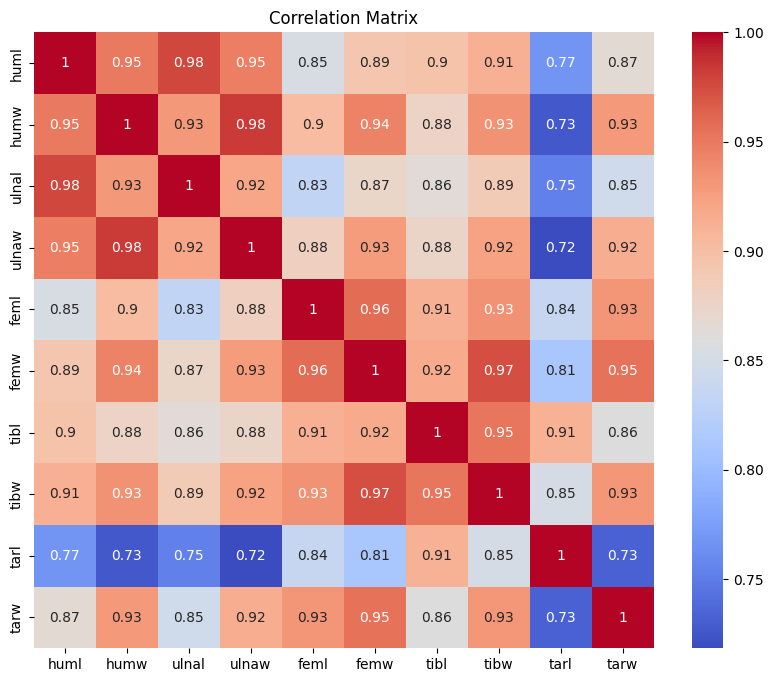

Highly Correlated Features:
huml - humw
huml - ulnal
huml - ulnaw
huml - feml
huml - femw
huml - tibl
huml - tibw
huml - tarl
huml - tarw
humw - ulnal
humw - ulnaw
humw - feml
humw - femw
humw - tibl
humw - tibw
humw - tarl
humw - tarw
ulnal - ulnaw
ulnal - feml
ulnal - femw
ulnal - tibl
ulnal - tibw
ulnal - tarl
ulnal - tarw
ulnaw - feml
ulnaw - femw
ulnaw - tibl
ulnaw - tibw
ulnaw - tarl
ulnaw - tarw
feml - femw
feml - tibl
feml - tibw
feml - tarl
feml - tarw
femw - tibl
femw - tibw
femw - tarl
femw - tarw
tibl - tibw
tibl - tarl
tibl - tarw
tibw - tarl
tibw - tarw
tarl - tarw


In [55]:
# Compute the correlation matrix
data1= data.drop('id', axis=1)

corr_matrix = data1.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Set the threshold for correlation
threshold = 0.7

# Find highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)
highly_correlated = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*highly_correlated) if x != y and x < y]

# Print the highly correlated features
print("Highly Correlated Features:")
for feature1, feature2 in highly_correlated:
    print(f"{feature1} - {feature2}")

In [56]:
corr_matrix


,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
huml,1.000000,0.950370,0.977400,0.947068,0.852741,0.893119,0.895760,0.912782,0.767217,0.866142
humw,0.950370,1.000000,0.929803,0.982551,0.902287,0.944152,0.876987,0.934307,0.726798,0.929113
ulnal,0.977400,0.929803,1.000000,0.920501,0.832513,0.873528,0.863952,0.886979,0.752833,0.845668
ulnaw,0.947068,0.982551,0.920501,1.000000,0.882230,0.927679,0.875396,0.923238,0.718357,0.915201
feml,0.852741,0.902287,0.832513,0.882230,1.000000,0.957311,0.912080,0.934498,0.837143,0.932734
femw,0.893119,0.944152,0.873528,0.927679,0.957311,1.000000,0.917302,0.973805,0.811852,0.954237
tibl,0.895760,0.876987,0.863952,0.875396,0.912080,0.917302,1.000000,0.952063,0.911848,0.860087
tibw,0.912782,0.934307,0.886979,0.923238,0.934498,0.973805,0.952063,1.000000,0.851358,0.930850
tarl,0.767217,0.726798,0.752833,0.718357,0.837143,0.811852,0.911848,0.851358,1.000000,0.732254
tarw,0.866142,0.929113,0.845668,0.915201,0.932734,0.954237,0.860087,0.930850,0.732254,1.000000


* There is a strong positive correlation between 'huml' and 'humw' (0.95), 'huml' and 'ulnal' (0.98), and 'huml' and 'ulnaw' (0.95). This suggests that these variables tend to increase or decrease together.
* Similarly, there is a strong positive correlation between 'humw' and 'ulnal' (0.93), 'humw' and 'ulnaw' (0.98), and 'humw' and 'femw' (0.94).
* 'ulnal' and 'ulnaw' also exhibit a strong positive correlation (0.92), indicating that they are likely to vary together.
* There is a moderate positive correlation between 'feml' and 'femw' (0.96), 'feml' and 'tibl' (0.91), and 'feml' and 'tarw' (0.83).
* 'tibl' and 'tibw' show a strong positive correlation (0.95), suggesting a tendency to vary together.
* 'tarl' and 'tarw' have a moderate positive correlation (0.73).

Set Target and Feature Variables

In [57]:
# Separate the features and target variable
X = data.drop('type', axis=1)
y = data['type']

**Label Encoder  :** Label encoding is a preprocessing technique commonly used in machine learning to convert categorical variables into numerical representations. It assigns a unique numerical label to each unique category in the categorical variable. The label encoding process is applied to transform the categorical data into a format that can be processed by machine learning algorithms that expect numeric inputs.Here,
* 'P' is encoded as 0
* 'R' is encoded as 1
* 'SO' is encoded as 2
* 'SW' is encoded as 3
* 'T' is encoded as 4
* 'W' is encoded as 5

In [58]:
# Convert categorical variable to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print the mapping of encoded values to original categories
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

# Update the 'type' column in the dataset with the encoded values
data['type'] = y_encoded
data

Label mapping: {'P': 0, 'R': 1, 'SO': 2, 'SW': 3, 'T': 4, 'W': 5}


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,4.404033,2.038620,4.290596,1.771557,3.756772,1.547563,3.299903,1.615420,3.681351,1.576915,3
1,1,4.498809,2.032088,4.400971,1.885553,3.872034,1.667707,4.397162,1.706565,3.749504,1.611436,3
2,2,4.394079,1.997418,4.252203,1.837370,3.785779,1.589235,4.335328,1.617406,3.671479,1.467874,3
3,3,4.365008,1.902108,4.201104,1.752672,3.714547,1.508512,4.250921,1.481605,3.604954,1.483875,3
4,4,4.155753,1.764731,3.971989,1.553925,3.553918,1.313724,4.047777,1.376244,3.492865,1.418277,3
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,2.942331,0.966984,3.022861,0.845868,2.963209,0.932164,3.473518,0.845868,3.135059,0.765468,2
416,416,3.006178,0.970779,3.080073,0.912283,3.007661,0.896088,3.532518,0.824175,3.202746,0.765468,2
417,417,2.985177,0.966984,3.036394,0.928219,3.089223,0.887891,3.568123,0.879627,3.172203,0.792993,2
418,418,3.062456,1.022451,3.158276,0.916291,3.106826,0.908259,3.613347,0.928219,3.295096,0.806476,2


**Feature selection using the chi-square test** is a statistical method used to assess the relationship between categorical features and a categorical target variable. It evaluates the dependence between two categorical variables by measuring the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence.

In [59]:

# Perform feature selection using chi-square test
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get the chi-square scores for each feature
chi_scores = selector.scores_

# Create a dictionary to map features to their chi-square scores
feature_scores = dict(zip(X.columns, chi_scores))

# Sort features based on chi-square scores in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the chi-square scores for each feature in descending order
print("Chi-square Scores (Descending Order):")
for feature, score in sorted_features:
    print(f"{feature}: {score}")


Chi-square Scores (Descending Order):
id: 27829.47016706449
huml: 35.44245605289513
tarw: 33.56414275008972
tibw: 29.864642711749102
humw: 29.855159168299053
ulnaw: 28.058448638433404
ulnal: 27.745013057629986
femw: 25.466432576304072
feml: 12.918071981726163
tibl: 12.310757627669807
tarl: 8.585351492840193


Higher scores indicate a stronger association between the feature and the target variable, suggesting that the feature may be informative for the classification task. In this case, the 'huml' feature has the highest chi-square score, indicating a strong association with the target variable. On the other hand, 'tarl' has the lowest score among the features listed.

## Split data into Train and Test

The train-test split is a crucial step in machine learning where the dataset is divided into two separate parts: a training set and a test set. This division allows us to assess the performance and generalization of the trained model. While the standard practice is to allocate 80% of the data to the training set and 20% to the test set, the actual split ratio may vary depending on factors such as dataset size and specific requirements of the problem at hand.

In [60]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Firstly, the data is split into training and testing sets, where 80% of the data is allocated for training and 20% for testing. Subsequently, the features in the training and testing sets are standardized using the StandardScaler, ensuring they have zero mean and unit variance. This step is crucial for avoiding bias towards certain features and enabling proper comparison between them. Lastly, the Synthetic Minority Over-sampling Technique (SMOTE) is applied to address class imbalance in the training set by generating synthetic samples of the minority class. This helps create a balanced distribution of classes, enhancing the model's ability to learn from the minority class. The resulting resampled training set, along with the original testing set, can then be used for model training and evaluation, respectively.

## Model Training

Here I using 3 models for classification

1. Random Forest Classifier
2. Decision Tree Classifier
3. Support Vector Machine Classifier

### Hyper parameter Optimizer

A hyperparameter optimizer is a component or algorithm used in machine learning to automatically search for the best combination of hyperparameters for a given model. Hyperparameters are parameters that are set before the training process and cannot be learned from the data.

The role of a hyperparameter optimizer is to explore the hyperparameter space and find the combination of values that maximizes or minimizes a chosen evaluation metric, such as accuracy or loss. This is typically done through an iterative process where different combinations of hyperparameters are evaluated and compared.There are several popular hyperparameter optimization techniques, including: Grid Search,Random Search,Bayesian Optimization,Genetic Algorithms and Gradient-Based Optimization.

Here I used Grid search for all models.

The grid search algorithm works by defining a grid of hyperparameter values to explore. Each combination of hyperparameters is then evaluated using a specified evaluation metric, such as accuracy or mean squared error, by performing cross-validation on the training data.

By exhaustively searching through all possible combinations of hyperparameters in the defined grid, grid search helps to identify the set of hyperparameters that yield the best performance on the evaluation metric. It allows for a more systematic and automated approach to hyperparameter tuning, saving time and effort compared to manually tuning each hyperparameter individually.

Note: The "param_grid" variable represents a grid of hyperparameters that can be tuned for a machine learning model.

### Model Evaluation

After training the model, the next crucial step is evaluating its performance on the test set, which was separated using the train-test split method. This evaluation is essential to gauge how well the model is expected to perform on new, unseen data. By assessing the model's performance on the test set, we can gain insights into its ability to generalize and make accurate predictions in real-world scenarios. This evaluation step allows us to validate the model's effectiveness and make informed decisions about its deployment or potential improvements.

* A classification report is a concise summary of the performance of a classification model, providing detailed metrics for each class. It includes metrics such as precision, recall, F1-score, and support. Precision measures the accuracy of positive predictions, recall calculates the sensitivity or true positive rate, and the F1-score is the harmonic mean of precision and recall. The support metric represents the number of samples in each class. The classification report provides a comprehensive overview of the model's performance on a class-by-class basis, helping to assess its ability to correctly classify different classes and aiding in identifying areas that may require further attention or improvement.

* A confusion matrix is a concise summary of a classification model's performance. It presents a square matrix where each row corresponds to the actual class labels, and each column represents the predicted class labels. The matrix contains counts or frequencies of true positives, true negatives, false positives, and false negatives. From this matrix, various metrics such as accuracy, precision, recall, and F1-score can be calculated to evaluate the model's overall accuracy and its ability to correctly classify positive and negative instances. The confusion matrix provides a comprehensive and informative assessment of the model's predictive performance and aids in identifying areas of improvement or further analysis.

### Random Forest Classifier

Random Forest is an ensemble learning algorithm that combines multiple decision trees to make accurate predictions. It randomly selects subsets of data and features to train each tree, reducing overfitting and improving generalization. During prediction, the algorithm aggregates the individual tree predictions to make the final prediction. Random Forest is versatile, handling both classification and regression tasks, and can handle high-dimensional data, missing values, and outliers. It is computationally efficient and provides insights into feature importance, making it widely used in different domains.


Parameter Grid:
* 'n_estimators': This parameter determines the number of trees in the forest. The grid includes options of 100, 200, and 300 trees.

* 'max_depth': This parameter specifies the maximum depth of each tree. The grid includes options of no maximum depth (None), as well as depths of 5 and 10.

* 'min_samples_split': This parameter sets the minimum number of samples required to split an internal node. The grid includes options of 2, 5, and 10 samples.

* 'min_samples_leaf': This parameter sets the minimum number of samples required to be at a leaf node. The grid includes options of 1, 2, and 4 samples.

In [61]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a random forest classifier
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_rfc_model = grid_search.best_estimator_
accuracy = best_rfc_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 98.81%


The output suggests that the best hyperparameters for the model were found to be:

* 'max_depth': None
* 'min_samples_leaf': 1
* 'min_samples_split': 2
* 'n_estimators': 100

 These values indicate that the model performed best with an unlimited maximum depth, a minimum of 1 sample required at each leaf node, a minimum of 2 samples required to split an internal node, and 100 trees in the random forest.

The accuracy achieved by the model using these hyperparameters is reported as 98.81%. This suggests that the model is performing well and is able to accurately classify the given data with a high level of accuracy.

### Model Evaluation of Random forest classifier

In [62]:

y_rfc_pred = best_rfc_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_rfc_pred)
precision = precision_score(y_test, y_rfc_pred, average='weighted')
recall = recall_score(y_test, y_rfc_pred, average='weighted')

# Print the classification report
print(classification_report(y_test, y_rfc_pred))

f1 = f1_score(y_test, y_rfc_pred, average='weighted')
confusion = confusion_matrix(y_test, y_rfc_pred)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           P       1.00      1.00      1.00         8
           R       1.00      1.00      1.00         6
          SO       1.00      1.00      1.00        26
          SW       0.97      1.00      0.98        30
           T       1.00      1.00      1.00         4
           W       1.00      0.90      0.95        10

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

Accuracy: 98.81%
Precision: 0.99
Recall: 0.99
F1-score: 0.99
Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  1  0  9]]


### Decision Tree Classifier

A decision tree classifier is a machine learning algorithm that creates a tree-like model for classification and regression tasks. It partitions the feature space by recursively selecting the best features to split the data, forming decision rules at each internal node. The algorithm traverses the tree to make predictions based on the feature values, ultimately assigning a class label at the leaf nodes. Decision trees are interpretable, handle different types of features, and can capture non-linear relationships. However, they are prone to overfitting, which can be mitigated using pruning and regularization techniques. Overall, decision tree classifiers offer a versatile and intuitive approach to data analysis and prediction.

Parameter Grid :

* 'criterion': It specifies the split criterion for decision making, with options of 'gini' or 'entropy'.
* 'max_depth': It determines the maximum depth of the decision tree, with values of 3, 5, 7, or None (unlimited depth).
* 'min_samples_split': It sets the minimum number of samples required to split an internal node, with options of 2, 5, or 10.
* 'min_samples_leaf': It defines the minimum number of samples required to be at a leaf node, with values of 1, 2, or 4.
* 'max_features': It determines the maximum number of features to consider for the best split, with options of 'auto', 'sqrt', 'log2', or None (consider all features).
By exploring different combinations of these hyperparameters, I can search for the optimal configuration that yields the best performance for the decision tree classifier.

In [63]:


# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Maximum number of features to consider for the best split
}

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_dtc_model = grid_search.best_estimator_
accuracy = best_dtc_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 98.81%


Output shows the best hyperparameters found during the tuning process for a decision tree classifier. The best hyperparameters are as follows:

* 'criterion': 'gini'
* 'max_depth': 5
* 'max_features': None
* 'min_samples_leaf': 1
* 'min_samples_split': 2

This means that the decision tree classifier achieved the highest accuracy of 98.81% when using these hyperparameter values.

* The 'criterion' is set to 'gini', indicating that the Gini impurity measure was used as the split criterion for decision making.

* The 'max_depth' is set to 5, limiting the depth of the decision tree to five levels. This helps control the complexity of the model and prevents overfitting.

* The 'max_features' is set to None, meaning that all features were considered for the best split.

* The 'min_samples_leaf' is set to 1, indicating that each leaf node must contain at least one sample.

* The 'min_samples_split' is set to 2, meaning that a node must have at least two samples to be eligible for splitting.

Overall, with these hyperparameters, the decision tree classifier achieved an accuracy of 98.81%, suggesting that it performed well in making accurate predictions on the given dataset.

### Model Evaluation of Decision Tree Classifier

In [64]:
y_dtc_pred = best_dtc_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_dtc_pred)
precision = precision_score(y_test, y_dtc_pred, average='weighted')
recall = recall_score(y_test, y_dtc_pred, average='weighted')
f1 = f1_score(y_test, y_dtc_pred, average='weighted')
confusion = confusion_matrix(y_test, y_dtc_pred)

# Print the classification report
print(classification_report(y_test, y_dtc_pred))

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           P       1.00      1.00      1.00         8
           R       1.00      1.00      1.00         6
          SO       1.00      1.00      1.00        26
          SW       0.97      1.00      0.98        30
           T       1.00      1.00      1.00         4
           W       1.00      0.90      0.95        10

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

Accuracy: 98.81%
Precision: 0.99
Recall: 0.99
F1-score: 0.99
Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  0  0  0  4  0]
 [ 0  0  0  1  0  9]]


### Support Vector Machine Classifier


The Support Vector Machine (SVM) classifier is a popular algorithm used for classification tasks. It finds an optimal hyperplane that maximally separates different classes in a high-dimensional feature space, by transforming the data using a kernel function. SVMs are efficient in handling high-dimensional data, can capture complex decision boundaries, and are robust to outliers. They can handle non-linear classification problems through implicit mapping. However, SVMs may have computational complexity with large datasets and require careful hyperparameter tuning. Overall, SVM classifiers are powerful tools for classification, providing accurate results through optimal hyperplane selection and feature space transformation.

Parameter Grid: The 'param_grid' dictionary represents a grid of hyperparameters for tuning a Support Vector Machine (SVM) classifier. The hyperparameters include:

* 'C': It is the regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error. It takes values of 0.1, 1, or 10.

* 'kernel': It specifies the kernel function used to transform the data into a higher-dimensional space. The options include 'linear' for a linear kernel, 'rbf' for a radial basis function kernel, and 'poly' for a polynomial kernel.

* 'gamma': It is the kernel coefficient and defines the influence of each training example on the decision boundary. The options are 'scale', which is calculated based on the inverse of the feature standard deviation, and 'auto', which uses 1/n_features.

By exploring different combinations of these hyperparameters, I can search for the optimal configuration that yields the best performance for the SVM classifier.

In [65]:

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Create an SVM classifier
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
accuracy = best_svm_model.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Best Hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 98.81%


Output shows the best hyperparameters found during the tuning process for a Support Vector Machine (SVM) classifier. The best hyperparameters are as follows:

* 'C': 10
* 'gamma': 'scale'
* 'kernel': 'linear'

This means that the SVM classifier achieved the highest accuracy of 98.81% when using these hyperparameter values.

* The 'C' parameter represents the regularization parameter, and a value of 10 suggests a relatively high regularization strength, which can help reduce overfitting by enforcing a stricter margin.

* The 'gamma' parameter is set to 'scale', which means it is calculated based on the inverse of the feature standard deviation. This helps adjust the influence of each training example on the decision boundary based on the spread of the data.

* The 'kernel' is set to 'linear', indicating that a linear kernel function was used. A linear kernel creates a linear decision boundary in the original feature space.

Overall, with these hyperparameters, the SVM classifier achieved an accuracy of 98.81%, indicating that it performed well in making accurate predictions on the given dataset, particularly by using a linear kernel with a higher regularization strength.

### Model Evaluation of Support Vector Machine

In [66]:
y_svm_pred = best_svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_svm_pred)
precision = precision_score(y_test, y_svm_pred, average='weighted')
recall = recall_score(y_test, y_svm_pred, average='weighted')
f1 = f1_score(y_test, y_svm_pred, average='weighted')
confusion = confusion_matrix(y_test, y_svm_pred)

# Print the classification report
print(classification_report(y_test, y_svm_pred))

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Confusion Matrix:")
print(confusion)

              precision    recall  f1-score   support

           P       1.00      1.00      1.00         8
           R       1.00      1.00      1.00         6
          SO       1.00      1.00      1.00        26
          SW       1.00      0.97      0.98        30
           T       1.00      1.00      1.00         4
           W       0.91      1.00      0.95        10

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84

Accuracy: 98.81%
Precision: 0.99
Recall: 0.99
F1-score: 0.99
Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0  6  0  0  0  0]
 [ 0  0 26  0  0  0]
 [ 0  0  0 29  0  1]
 [ 0  0  0  0  4  0]
 [ 0  0  0  0  0 10]]


I got 98.81 % accuracy for all models. Hence I performed cross validation to choose better model.

Cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves splitting the available dataset into multiple subsets or folds, where each fold is used as both a training set and a validation set.

The process typically follows these steps:

* The dataset is divided into K equal-sized folds.
* For each fold, the model is trained on the remaining K-1 folds and evaluated on the current fold.
* The performance metric, such as accuracy or mean squared error, is recorded for each fold.
* The average performance across all folds is calculated, providing an estimate of the model's performance.


Cross-validation helps in obtaining a more reliable evaluation of the model's performance by mitigating the effects of dataset variability and overfitting. It allows for better understanding of how the model generalizes to unseen data.

One common approach is K-fold cross-validation, where the dataset is divided into K folds, and the process is repeated K times, with each fold serving as the validation set once. The average performance across all K iterations provides a more robust estimation of the model's performance.



In [67]:
# Perform cross-validation
num_folds = 5
scoring = 'accuracy'

# Random Forest cross-validation
rf_scores = cross_val_score(best_rfc_model, X, y, cv=num_folds, scoring=scoring)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())

# SVM cross-validation
svm_scores = cross_val_score(best_svm_model, X, y, cv=num_folds, scoring=scoring)
print("SVM Cross-Validation Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())

# dt cross-validation
dt_scores = cross_val_score(best_dtc_model, X, y, cv=num_folds, scoring=scoring)
print("Decision tree Cross-Validation Scores:",dt_scores)
print("Decision tree Mean Accuracy:", dt_scores.mean())


Random Forest Cross-Validation Scores: [0.6547619  0.97619048 0.89285714 0.95238095 0.73809524]
Random Forest Mean Accuracy: 0.8428571428571429
SVM Cross-Validation Scores: [0.64285714 1.         1.         1.         0.6547619 ]
SVM Mean Accuracy: 0.8595238095238095
Decision tree Cross-Validation Scores: [0.63095238 1.         1.         1.         0.66666667]
Decision tree Mean Accuracy: 0.8595238095238095


# Result


Based on the above classification reports, all three models (Random Forest Classifier, Decision Tree Classifier, Support Vector Machine) demonstrate excellent performance with high accuracy, precision, recall, and F1-score. The accuracy achieved by each model is 98.81%, indicating their ability to make accurate predictions on the bird bone classification task.

Based on the cross-validation results, both the Support Vector Machine (SVM) and Decision Tree classifiers have similar mean accuracy scores of approximately 0.86. However, the Random Forest classifier has a slightly lower mean accuracy score of around 0.83.


The choice of the best model among these three would have depended on additional factors such as model complexity, interpretability, computational efficiency, and specific requirements of the task. Based on these factors, the Decision Tree model was a suitable choice for the bird classification task.  

 * Model Complexity: Decision Trees were known for their simplicity and interpretability. They consisted of a series of if-else statements that could be easily understood and visualized. This made it easier to interpret and explain the model's predictions, which was valuable in applications where interpretability was important.  

 * Interpretability: Decision Trees provided clear and intuitive decision rules based on the features of the data. This allowed domain experts to understand and validate the decision-making process of the model. The interpretability of Decision Trees was particularly beneficial in scenarios where explain ability was necessary, such as in wildlife conservation efforts.  

 * Computational Efficiency: Decision Trees were computationally efficient, especially when compared to more complex models like Random Forest or SVM. The training and prediction times for Decision Trees were typically faster, making them a practical choice for large datasets or real-time applications.  

 *	Specific Requirements: Decision Trees were known for their versatility and ability to handle both categorical and numerical data. They could capture nonlinear relationships and interactions between features, which were crucial for accurately classifying different bird species based on their unique characteristics.  



Considering the computational efficiency, interpretability, and specific requirements of the problem, the Decision Tree classifier would still be a suitable choice. It has comparable performance to the SVM classifier while being computationally more efficient and interpretable due to its tree-based structure. and Decision trees are computationally efficient as they have a lower computational complexity compared to ensemble methods like Random Forest.

Moreover, decision trees are highly interpretable, allowing us to understand the decision-making process and the importance of different features in classifying bird bones. This interpretability can be valuable in gaining insights into the classification process and potentially identifying key characteristics for bird bone classification.

Therefore, considering the high performance, computational efficiency, and interpretability, the Decision Tree Classifier is the suggested model for bird bone classification.